In [8]:
import re
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tavishipriyam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def clean_text(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    text = re.sub('\S*@\S*\s?', '', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("\'", "", text)
    tokens = text.split()
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

In [7]:
from wordcloud import WordCloud

In [9]:
fdf = pd.read_csv("female_data.csv")

/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_2580/668225261.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  fdf = pd.read_csv("female_data.csv")


In [11]:
fdf

,Unnamed: 0,attachments,author_id,conversation_id,created_at,entities,id,lang,public_metrics,text,user,referenced_tweets,retweeted_status,in_reply_to_user_id,geo,withheld,context_annotations,gender,age
0,0,{'media_keys': array(['3_1498447903970537477']...,9.546407e+07,1.498448e+18,2022-02-28 23:59:56+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1.498448e+18,en,"{'like_count': 783, 'quote_count': 2, 'reply_c...",i keep getting this ad for an electric car tha...,"{'created_at': '2009-12-08T17:34:25.000Z', 'de...",NaN,NaN,NaN,NaN,NaN,NaN,female,<=18
1,2,NaN,8.324659e+17,1.498448e+18,2022-02-28 23:59:17+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1.498448e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @HackRead: On hacked TV transmissions #Anon...,"{'created_at': '2017-02-17T05:45:11.000Z', 'de...","[{'id': '1498381160380080135', 'type': 'retwee...","{'attachments': None, 'author_id': '411396541'...",NaN,NaN,NaN,NaN,female,>=40
2,12,NaN,2.682930e+09,1.498447e+18,2022-02-28 23:57:46+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1.498447e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @ighaworth: @TomCottonAR “Just buy an elect...,"{'created_at': '2014-07-26T17:59:22.000Z', 'de...","[{'id': '1498116336794443780', 'type': 'retwee...","{'attachments': None, 'author_id': '1020580332...",NaN,NaN,NaN,NaN,female,30-39
3,13,NaN,1.133730e+18,1.498357e+18,2022-02-28 23:57:26+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1.498447e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",@steinberger_l Lol. My neighbor almost ran ove...,"{'created_at': '2019-05-29T13:40:20.000Z', 'de...","[{'id': '1498418481410318339', 'type': 'replie...","{'attachments': None, 'author_id': '1312392912...",1.312393e+18,NaN,NaN,NaN,female,>=40
4,15,NaN,5.982777e+07,1.498447e+18,2022-02-28 23:57:06+00:00,"{'annotations': array([{'end': 24, 'normalized...",1.498447e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @andersostlund: Europe should stop buying R...,"{'created_at': '2009-07-24T16:43:55.000Z', 'de...","[{'id': '1498168348860944384', 'type': 'retwee...","{'attachments': None, 'author_id': '21575717',...",NaN,NaN,NaN,NaN,female,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76612,53240,{'media_keys': array(['3_1485585684299763712']...,7.281870e+17,1.485586e+18,2022-01-24 12:10:02+00:00,"{'annotations': array([{'end': 13, 'normalized...",1.485586e+18,en,"{'like_count': 1, 'quote_count': 0, 'reply_cou...",The Government has granted a principle offer f...,"{'created_at': '2016-05-05T11:38:05.000Z', 'de...",NaN,NaN,NaN,NaN,NaN,NaN,female,>=40
76613,53245,NaN,1.479106e+18,1.485585e+18,2022-01-24 12:08:57+00:00,"{'annotations': array([{'end': 79, 'normalized...",1.485585e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @richjaguarz: To celebrate the announcement...,"{'created_at': '2022-01-06T15:01:22.000Z', 'de...","[{'id': '1484194465451769858', 'type': 'retwee...",{'attachments': {'media_keys': array(['3_14841...,NaN,NaN,NaN,NaN,female,30-39
76614,53247,NaN,1.347863e+18,1.485585e+18,2022-01-24 12:08:26+00:00,"{'annotations': array([{'end': 38, 'normalized...",1.485585e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @thebetterindia: These made-in-India electr...,"{'created_at': '2021-01-09T11:11:25.000Z', 'de...","[{'id': '1485258546317045765', 'type': 'retwee...","{'attachments': None, 'author_id': '16093478',...",NaN,NaN,NaN,NaN,female,30-39
76615,53250,NaN,1.377255e+18,1.485585e+18,2022-01-24 12:07:49+00:00,"{'annotations': array([{'end': 79, 'normalized...",1.485585e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @richjaguarz: To celebrate the announcement...,"{'created_at': '2021-03-31T13:43:55.000Z', 'de...","[{'id': '1484194465451769858', 'type': 'retwee...",{'attachments': {'media_keys': array(['3_14841...,NaN,NaN,NaN,NaN,female,30-39


In [10]:
mdf = pd.read_csv("male_data.csv")

/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_2580/519882020.py:1: DtypeWarning: Columns (0,15) have mixed types. Specify dtype option on import or set low_memory=False.
  mdf = pd.read_csv("male_data.csv")


In [12]:
mdf

,Unnamed: 0,attachments,author_id,conversation_id,created_at,entities,id,lang,public_metrics,text,user,referenced_tweets,retweeted_status,in_reply_to_user_id,geo,withheld,context_annotations,gender,age
0,1,NaN,1.324897e+18,1.498448e+18,2022-02-28 23:59:22+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1.498448e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @HackRead: On hacked TV transmissions #Anon...,"{'created_at': '2020-11-07T02:10:57.000Z', 'de...","[{'id': '1498381160380080135', 'type': 'retwee...","{'attachments': None, 'author_id': '411396541'...",NaN,NaN,NaN,NaN,male,<=18
1,3,NaN,1.497817e+18,1.498448e+18,2022-02-28 23:59:15+00:00,"{'annotations': array([{'end': 108, 'normalize...",1.498448e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @softwarnet: #infosec \nhttps://t.co/x5meu1...,"{'created_at': '2022-02-27T06:12:17.000Z', 'de...","[{'id': '1498342666546733056', 'type': 'retwee...","{'attachments': None, 'author_id': '4148621113...",NaN,NaN,NaN,NaN,male,>=40
2,4,NaN,1.213556e+18,1.498448e+18,2022-02-28 23:58:48+00:00,"{'annotations': array([{'end': 94, 'normalized...",1.498448e+18,en,"{'like_count': 3, 'quote_count': 0, 'reply_cou...","A problem for electric vehicle owners? ""Anonym...","{'created_at': '2020-01-04T20:22:27.000Z', 'de...",NaN,NaN,NaN,NaN,NaN,NaN,male,>=40
3,5,NaN,1.727390e+09,1.498391e+18,2022-02-28 23:58:40+00:00,"{'annotations': array([{'end': 34, 'normalized...",1.498448e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",@garyblack00 I can’t afford a Tesla right now ...,"{'created_at': '2013-09-04T03:01:38.000Z', 'de...","[{'id': '1498391412659953673', 'type': 'replie...",{'attachments': {'media_keys': array(['3_14983...,1.161704e+18,NaN,NaN,NaN,male,>=40
4,6,NaN,1.378083e+18,1.498448e+18,2022-02-28 23:58:36+00:00,"{'annotations': array([{'end': 127, 'normalize...",1.498448e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @kathygpr: Remember: The previous admin was...,"{'created_at': '2021-04-02T20:33:02.000Z', 'de...","[{'id': '1498446693502623745', 'type': 'retwee...","{'attachments': None, 'author_id': '8204921770...",NaN,NaN,NaN,NaN,male,>=40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223382,53248,NaN,1.025679e+18,1.485585e+18,2022-01-24 12:07:57+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1.485585e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @LucidMotors: The longest range car of the ...,"{'created_at': '2018-08-04T09:43:28.000Z', 'de...","[{'id': '1460217211100954624', 'type': 'retwee...",{'attachments': {'media_keys': array(['13_1460...,NaN,NaN,NaN,NaN,male,30-39
223383,53249,NaN,5.199569e+08,1.485585e+18,2022-01-24 12:07:53+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1.485585e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...","RT @teamswiftparrot: I’m not a car guy, but at...","{'created_at': '2012-03-10T00:38:28.000Z', 'de...","[{'id': '1485520486369214464', 'type': 'retwee...","{'attachments': None, 'author_id': '2872961599...",NaN,NaN,NaN,NaN,male,<=18
223384,53251,NaN,1.484017e+18,1.485585e+18,2022-01-24 12:07:46+00:00,"{'annotations': None, 'cashtags': None, 'hasht...",1.485585e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",Break-Through Ultra-Precision Machining Platfo...,"{'created_at': '2022-01-20T04:17:10.000Z', 'de...",NaN,NaN,NaN,NaN,NaN,NaN,male,>=40
223385,53252,NaN,5.586152e+07,1.485585e+18,2022-01-24 12:07:45+00:00,"{'annotations': array([{'end': 31, 'normalized...",1.485585e+18,en,"{'like_count': 0, 'quote_count': 0, 'reply_cou...",RT @hartfordcourant: Connecticut is embarking ...,"{'created_at': '2009-07-11T16:04:56.000Z', 'de...","[{'id': '1485583832120180746', 'type': 'retwee...","{'attachments': None, 'author_id': '14708814',...",NaN,NaN,NaN,NaN,male,30-39


In [15]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tavishipriyam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## FEMALE TOPICS

In [13]:
fdf['cleanText'] = fdf['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [16]:
fdf['cleanText'] = \
fdf['cleanText'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
fdf['cleanText'] = \
fdf['cleanText'].map(lambda x: x.lower())
# Print out the first rows of papers
fdf['cleanText'].head()


0    i keep getting this ad for an electric car tha...
1    rt @hackread: on hacked tv transmissions #anon...
2    rt @ighaworth: @tomcottonar “just buy an elect...
3    @steinberger_l lol my neighbor almost ran over...
4    rt @andersostlund: europe should stop buying r...
Name: cleanText, dtype: object

In [29]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','electric','vehicle','vehicles','car','cars','rt'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
## add electric, vehicle, rts etc in stopwords


In [30]:
fdata = fdf['cleanText'].values.tolist()
fdata_words = list(sent_to_words(fdata))
# remove stop words
fdata_words = remove_stopwords(fdata_words)
print(fdata_words[:1][0][:30])

['keep', 'getting', 'ad', 'opens', 'really', 'tiny', 'supposed', 'comically', 'small', 'compared', 'sedan', 'sized', 'actually', 'selling', 'ever', 'think', 'wait', 'looks', 'perfect']


In [31]:
import gensim.corpora as corpora
# Create Dictionary
fid2word = corpora.Dictionary(fdata_words)
# Create Corpus
ftexts = fdata_words
# Term Document Frequency
fcorpus = [fid2word.doc2bow(text) for text in ftexts]
# View
print(fcorpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


In [32]:
import os
import pyLDAvis.gensim_models

In [33]:
from pprint import pprint
# number of topics
num_topics = 15
# Build LDA model
lda_model_f = gensim.models.LdaMulticore(corpus=fcorpus,
                                       id2word=fid2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_f.print_topics())
doc_lda = lda_model_f[fcorpus]

[(0,
  '0.019*"biden" + 0.019*"charging" + 0.018*"elon" + 0.018*"musk" + '
  '0.017*"new" + 0.016*"first" + 0.011*"tesla" + 0.010*"manufacturing" + '
  '0.009*"bentley" + 0.009*"ev"'),
 (1,
  '0.022*"gas" + 0.015*"time" + 0.013*"buying" + 0.013*"oil" + 0.013*"stop" + '
  '0.012*"europe" + 0.011*"push" + 0.011*"houses" + 0.011*"winter" + '
  '0.010*"season"'),
 (2,
  '0.035*"irony" + 0.034*"buy" + 0.031*"save" + 0.031*"planet" + 0.024*"kill" '
  '+ 0.024*"oh" + 0.023*"tree" + 0.023*"decides" + 0.023*"steveluke" + '
  '0.018*"see"'),
 (3,
  '0.019*"buy" + 0.017*"planet" + 0.017*"save" + 0.015*"oh" + 0.015*"tree" + '
  '0.015*"decides" + 0.015*"kill" + 0.014*"irony" + 0.014*"steveluke" + '
  '0.011*"charging"'),
 (4,
  '0.031*"tesla" + 0.030*"charging" + 0.018*"station" + 0.012*"every" + '
  '0.011*"amp" + 0.010*"gas" + 0.010*"india" + 0.009*"like" + 0.009*"ev" + '
  '0.008*"company"'),
 (5,
  '0.015*"american" + 0.013*"fools" + 0.011*"ev" + 0.010*"state" + 0.010*"new" '
  '+ 0.008*"biden

In [35]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('fol'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model_f, fcorpus, fid2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'fol'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4      0.068872 -0.042553       1        1  9.236750
12    -0.151109 -0.079977       2        1  8.352231
1      0.087486  0.003340       3        1  7.918309
6     -0.118281 -0.161828       4        1  7.498999
11     0.012019 -0.002984       5        1  7.128699
7     -0.011187  0.022458       6        1  6.818851
9     -0.000942 -0.044317       7        1  6.674566
8     -0.035653 -0.028922       8        1  6.633978
0      0.150025 -0.049593       9        1  6.546395
14     0.089390  0.025549      10        1  6.359201
13    -0.013698  0.004679      11        1  6.072645
5      0.059301  0.028955      12        1  5.785973
2     -0.111824  0.173634      13        1  5.615650
10     0.021609  0.007669      14        1  5.269086
3     -0.046005  0.143889      15        1  4.088667, topic_info=        Term         Freq        Total Category  logprob  loglift
2249   irony  3246.000000  3246.000000  Default  30.0000  30.0000
464   planet  3161.000000  3161.000000  Default  29.0000  29.0000
1205    save  3216.000000  3216.000000  Default  28.0000  28.0000
283     take  5751.000000  5751.000000  Default  27.0000  27.0000
33       buy  4789.000000  4789.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
180   charge   124.169796  7424.680355  Topic15  -5.6970  -0.8940
16     think    98.852415  1102.819056  Topic15  -5.9250   0.7850
2757    full    96.606630   959.892738  Topic15  -5.9480   0.9008
318   people   102.091878  2241.320427  Topic15  -5.8928   0.1080
84     biden   103.485667  5118.847435  Topic15  -5.8792  -0.7043

[1189 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
17379      9  0.942407      accidents
9492       4  0.215699     accounting
9492      15  0.739539     accounting
22483      4  0.993125       achieves
7158       7  0.956599  acknowledging
...      ...       ...            ...
3111      12  0.025132           zero
3111      13  0.012566           zero
3111      14  0.018849           zero
3111      15  0.036442           zero
9022      13  0.947566     zimbabwean

[6087 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 13, 2, 7, 12, 8, 10, 9, 1, 15, 14, 6, 3, 11, 4])

In [36]:
import matplotlib.pyplot as plt

In [37]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()

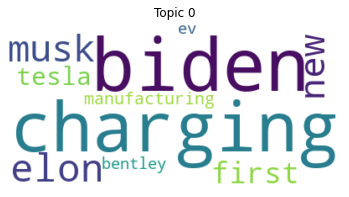

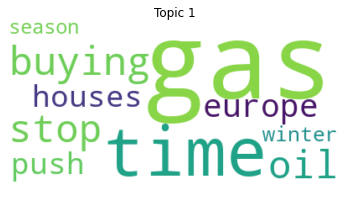

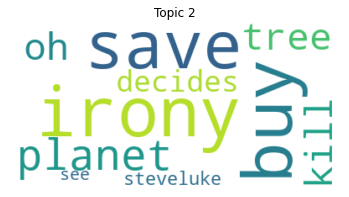

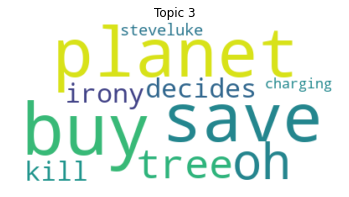

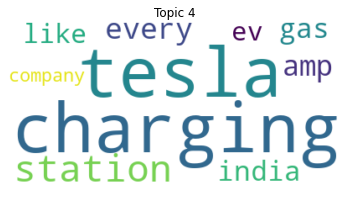

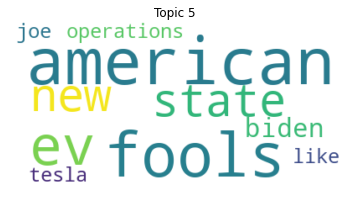

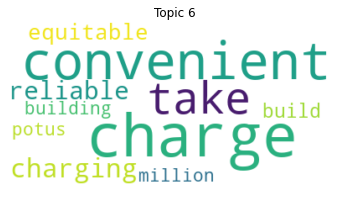

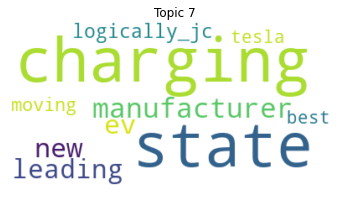

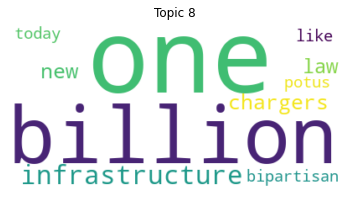

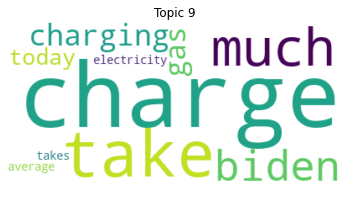

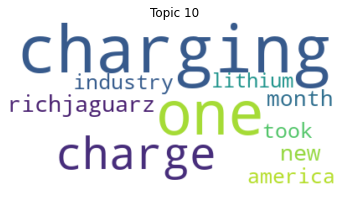

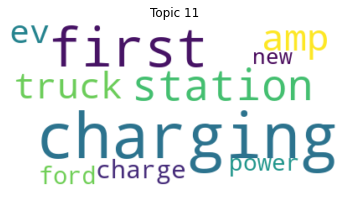

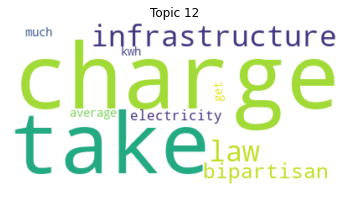

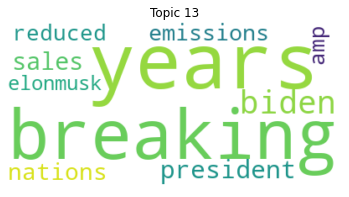

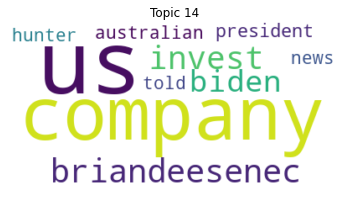

In [38]:
for i in range(0,num_topics):
    create_wordcloud(lda_model_f, topic=i)

### xxxx------------------------------------------------------------------------------------------------------------------------------xxxx

## MALE TOPICS

In [40]:
mdf['cleanText'] = mdf['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

<>:1: DeprecationWarning: invalid escape sequence \/
<>:1: DeprecationWarning: invalid escape sequence \/
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_2580/3671357227.py:1: DeprecationWarning: invalid escape sequence \/
  mdf['cleanText'] = mdf['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [41]:
mdf['cleanText'] = \
mdf['cleanText'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
mdf['cleanText'] = \
mdf['cleanText'].map(lambda x: x.lower())
# Print out the first rows of papers
mdf['cleanText'].head()


<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_2580/705822205.py:2: DeprecationWarning: invalid escape sequence \.
  mdf['cleanText'].map(lambda x: re.sub('[,\.!?]', '', x))


0    rt @hackread: on hacked tv transmissions #anon...
1                          rt @softwarnet: #infosec \n
2    a problem for electric vehicle owners "anonymo...
3    @garyblack00 i can’t afford a tesla right now ...
4    rt @kathygpr: remember: the previous admin was...
Name: cleanText, dtype: object

In [42]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','electric','vehicle','vehicles','car','cars','rt'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
## add electric, vehicle, rts etc in stopwords


In [43]:
mdata = mdf['cleanText'].values.tolist()
mdata_words = list(sent_to_words(mdata))
# remove stop words
mdata_words = remove_stopwords(mdata_words)
print(mdata_words[:1][0][:30])

['hackread', 'hacked', 'tv', 'transmissions', 'anonymous', 'displayed', 'national', 'anthem', 'ukraine', 'another', 'video', 'shows', 'vehicl']


In [45]:
import gensim.corpora as corpora
# Create Dictionary
mid2word = corpora.Dictionary(mdata_words)
# Create Corpus
mtexts = mdata_words
# Term Document Frequency
mcorpus = [mid2word.doc2bow(text) for text in mtexts]
# View
print(mcorpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [32]:
import os
import pyLDAvis.gensim_models

In [46]:
from pprint import pprint
# number of topics
num_topics = 15
# Build LDA model
lda_model_m = gensim.models.LdaMulticore(corpus=mcorpus,
                                       id2word=mid2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_m.print_topics())
doc_lda_m = lda_model_m[mcorpus]

[(0,
  '0.038*"tesla" + 0.034*"biden" + 0.024*"president" + 0.020*"elonmusk" + '
  '0.018*"truck" + 0.016*"sawyermerritt" + 0.016*"breaking" + 0.012*"first" + '
  '0.011*"sold" + 0.011*"new"'),
 (1,
  '0.042*"kwh" + 0.038*"electricity" + 0.020*"every" + 0.016*"brand" + '
  '0.016*"gas" + 0.013*"delorean" + 0.012*"back" + 0.010*"made" + '
  '0.010*"famous" + 0.010*"future"'),
 (2,
  '0.010*"batteries" + 0.008*"charge" + 0.008*"foreign" + 0.007*"improvement" '
  '+ 0.007*"gas" + 0.007*"best" + 0.007*"announcement" + 0.006*"battery" + '
  '0.006*"get" + 0.006*"power"'),
 (3,
  '0.020*"law" + 0.018*"potus" + 0.017*"infrastructure" + 0.016*"building" + '
  '0.015*"new" + 0.013*"china" + 0.012*"billion" + 0.012*"one" + '
  '0.012*"bipartisan" + 0.011*"chargers"'),
 (4,
  '0.033*"largest" + 0.028*"tesla" + 0.020*"new" + 0.014*"model" + '
  '0.012*"ford" + 0.011*"lithium" + 0.009*"news" + 0.008*"top" + '
  '0.007*"charging" + 0.007*"million"'),
 (5,
  '0.023*"planet" + 0.022*"save" + 0.022*"bu

In [47]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('fol'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    mLDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model_m, mcorpus, mid2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(mLDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    mLDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(mLDAvis_prepared, 'fol'+ str(num_topics) +'.html')
mLDAvis_prepared

/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13    -0.014683 -0.022488       1        1  10.531082
8     -0.038727  0.023007       2        1   9.502978
2     -0.030447 -0.064018       3        1   9.274638
3      0.040631  0.056135       4        1   8.902828
10     0.015506  0.003390       5        1   8.185390
0      0.094328 -0.000650       6        1   7.143568
5      0.026606 -0.059441       7        1   6.489150
11     0.030575 -0.014146       8        1   5.998971
14    -0.077675  0.026260       9        1   5.850990
12    -0.049981 -0.214974      10        1   5.844081
7      0.235189  0.112603      11        1   5.702111
4      0.090529 -0.004633      12        1   4.982132
9     -0.096374  0.072146      13        1   4.963119
1     -0.030777 -0.076622      14        1   3.983674
6     -0.194699  0.163433      15        1   2.645288, topic_info=            Term          Freq         Total Category  logprob  loglift
53         tesla  27111.000000  27111.000000  Default  30.0000  30.0000
567       charge  15637.000000  15637.000000  Default  29.0000  29.0000
540         take   9775.000000   9775.000000  Default  28.0000  28.0000
17      charging  36394.000000  36394.000000  Default  27.0000  27.0000
221  electricity   6841.000000   6841.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
186        power    404.118388   6665.136532  Topic15  -5.1729   0.8295
633         good    295.487086   3803.652275  Topic15  -5.4860   1.0773
195          amp    369.960706  12176.281236  Topic15  -5.2612   0.1385
20            ev    301.790597  21103.939980  Topic15  -5.4649  -0.6151
17      charging    277.561741  36394.931230  Topic15  -5.5486  -1.2438

[1181 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
15034      6  0.957603   abolished
24079     11  0.991357        abou
6849       1  0.716995          ac
6849       2  0.034998          ac
6849       3  0.002838          ac
...      ...       ...         ...
16548      6  0.966654         zev
12799      2  0.033879    zimbabwe
12799      5  0.965547    zimbabwe
7210       8  0.987172  zimbabwean
7210      11  0.010969  zimbabwean

[6462 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 9, 3, 4, 11, 1, 6, 12, 15, 13, 8, 5, 10, 2, 7])

In [36]:
import matplotlib.pyplot as plt

In [37]:
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()

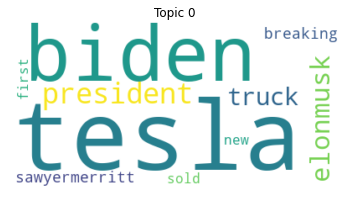

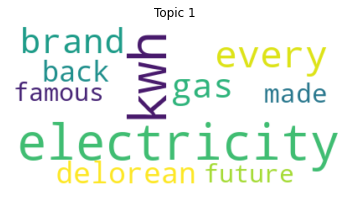

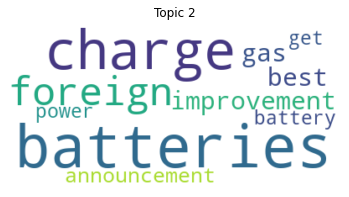

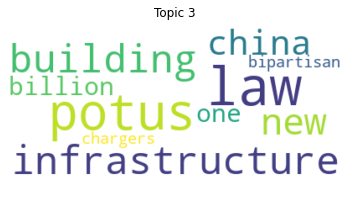

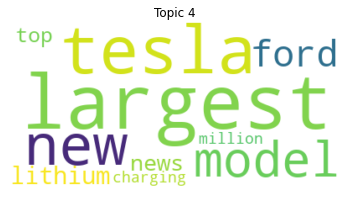

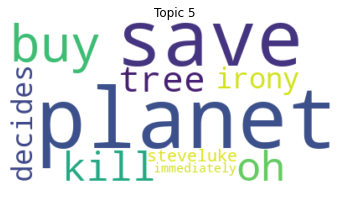

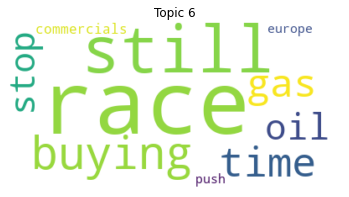

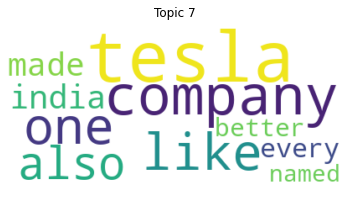

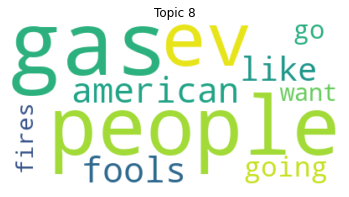

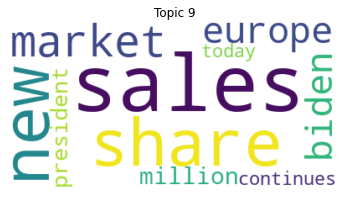

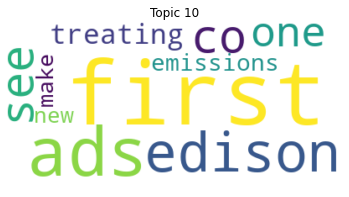

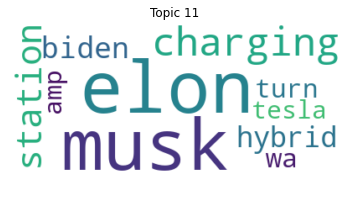

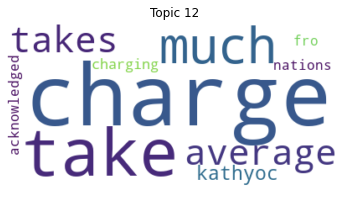

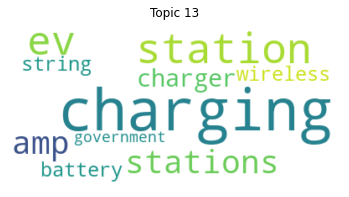

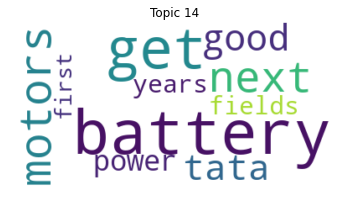

In [48]:
for i in range(0,num_topics):
    create_wordcloud(lda_model_m, topic=i)